# pythonのNMFを理解する

In [18]:
# モジュールのインポート
from sklearn.decomposition import NMF
import numpy as np
from matplotlib import pyplot as plt

In [19]:
# シミュレーションデータの作成
x = np.array([[1,2,3,4],[2,3,4,5],[1,3,5,7],[2,4,6,8],[5,6,7,8]])
x

array([[1, 2, 3, 4],
       [2, 3, 4, 5],
       [1, 3, 5, 7],
       [2, 4, 6, 8],
       [5, 6, 7, 8]])

In [20]:
nmf = NMF(n_components=2)
nmf.fit(x)

NMF(n_components=2)

In [21]:
H = nmf.components_
H

array([[2.73051173, 2.7179985 , 2.70548527, 2.69297205],
       [0.71417259, 2.13279355, 3.55141451, 4.97003548]])

In [22]:
W = nmf.fit_transform(x)
W

array([[0.18047702, 0.7072105 ],
       [0.54625237, 0.710153  ],
       [0.        , 1.40798067],
       [0.36095403, 1.414421  ],
       [1.64340963, 0.71910295]])

In [23]:
WH = np.dot(W,H)

In [24]:
np.round(WH,1)

array([[1., 2., 3., 4.],
       [2., 3., 4., 5.],
       [1., 3., 5., 7.],
       [2., 4., 6., 8.],
       [5., 6., 7., 8.]])

In [25]:
HW = np.dot(H,W)
np.round(HW,1)

ValueError: shapes (2,4) and (5,2) not aligned: 4 (dim 1) != 5 (dim 0)

In [8]:
np.sum(x- WH)

0.0014459050349159286

In [9]:
young_fname = "../data/Data_original/Young/EMG/sub01/Nagashima_noRAS1.mat"
elderly_fname = "../data/Data_original/Elderly/EMG/sub01/noRAS1.mat"

In [10]:
import preprocess as pp
import numpy as np
from matplotlib import pyplot as pyplot
import seaborn as sns

In [11]:
young_emg = pp.EMG(young_fname)
young_emg.filering(4, 0.5, 250)
young_emg.smooth()
young_emg.epoching(n=1000)
young_epochs = young_emg.lln_epochs

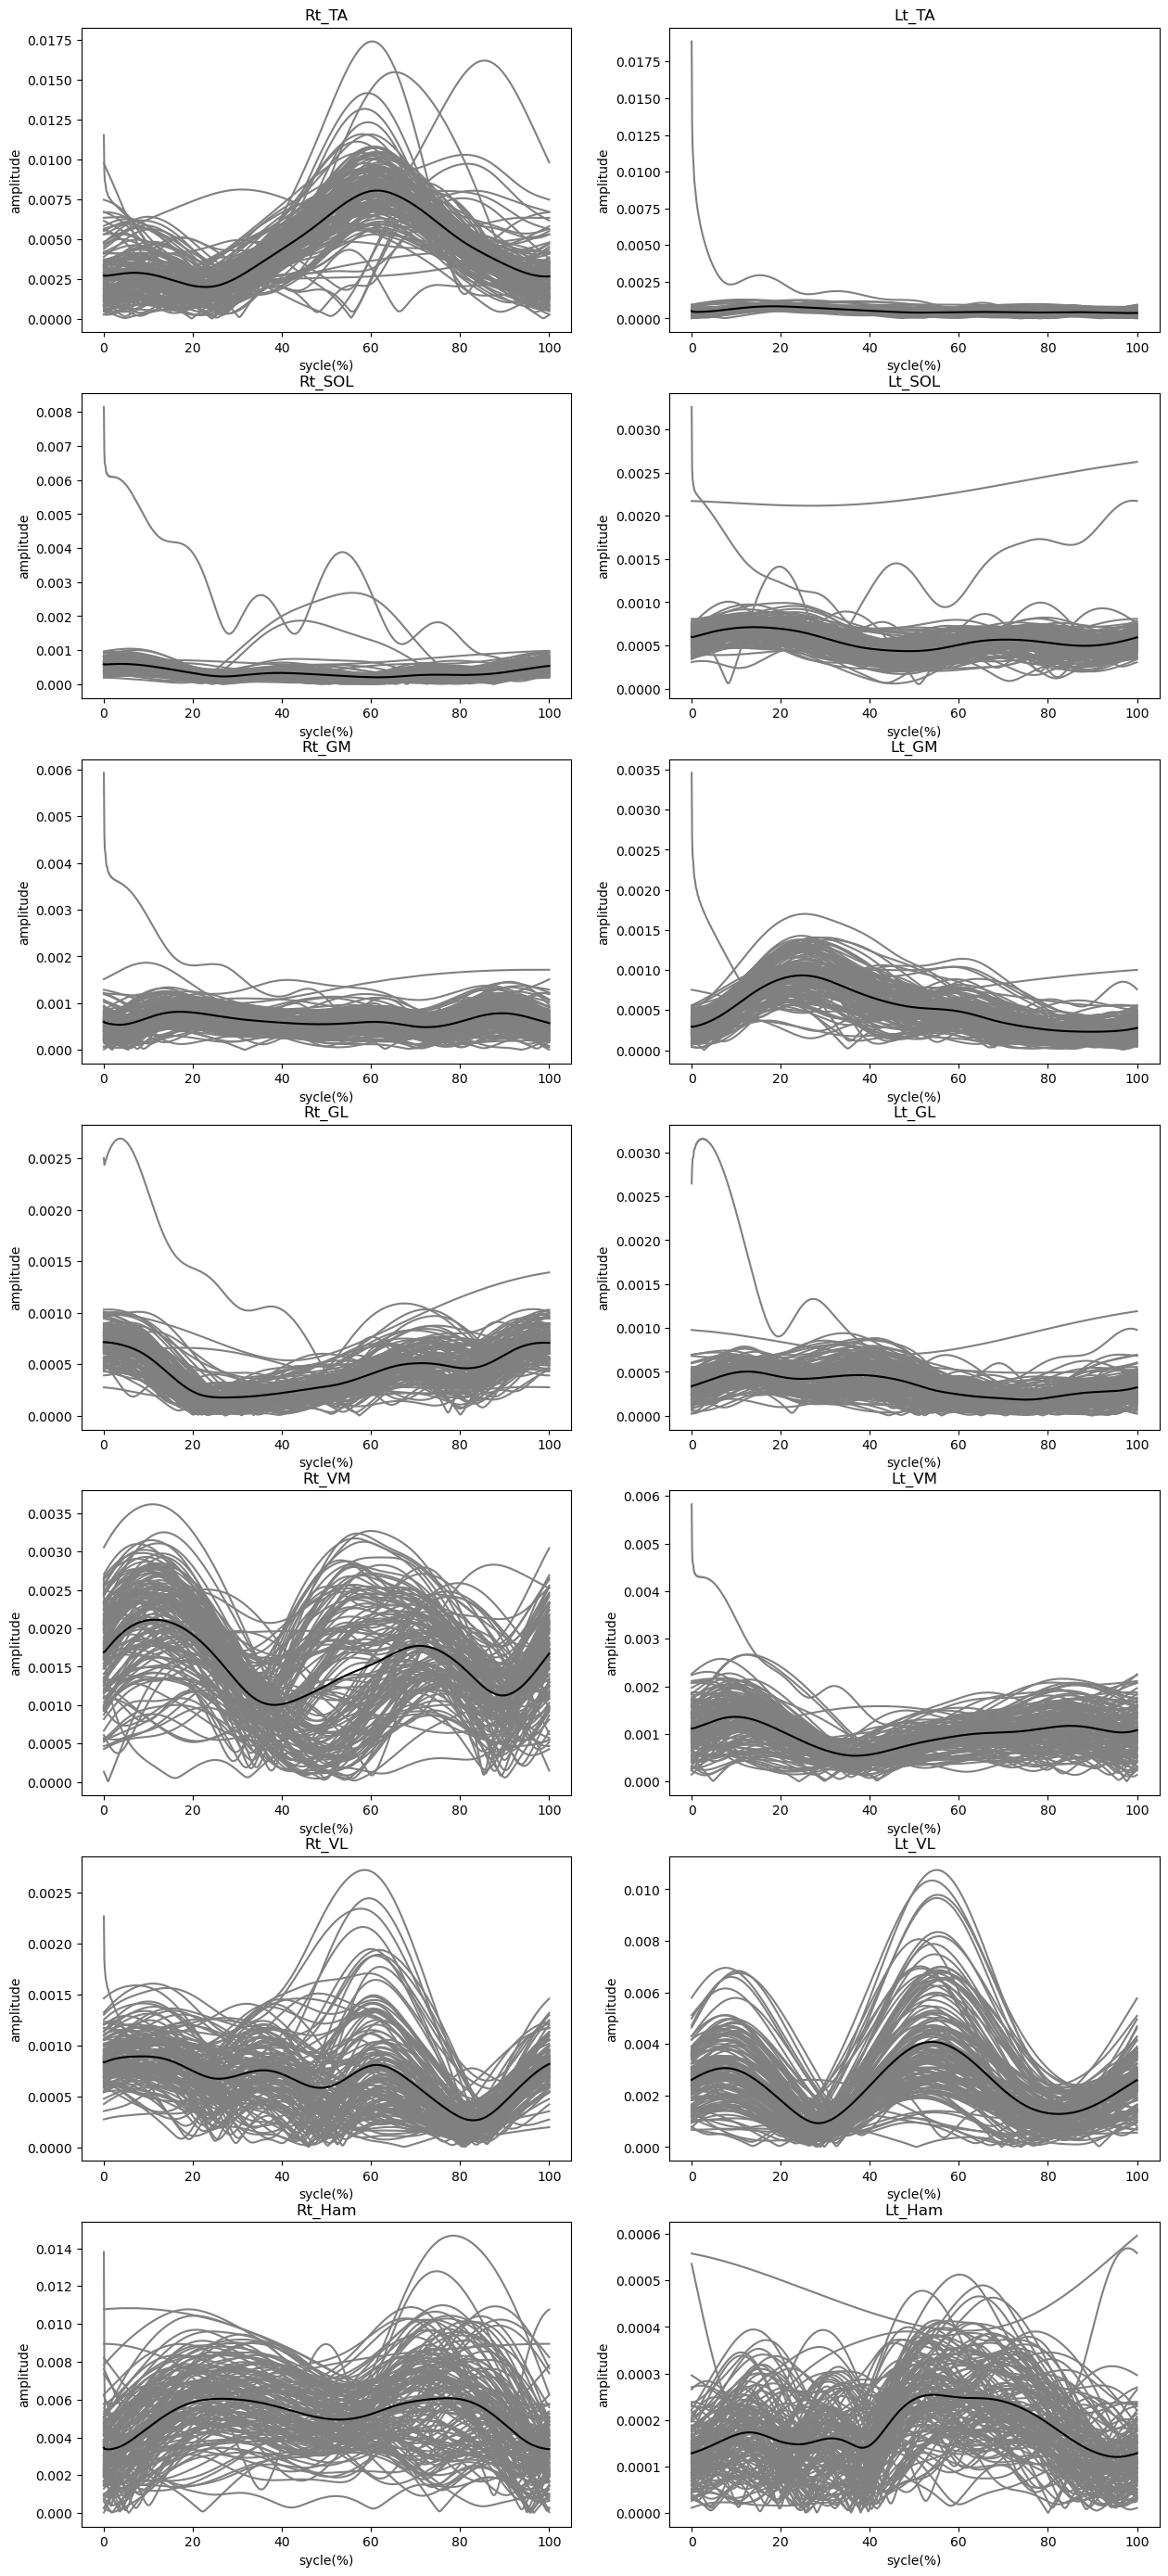

In [12]:
young_emg.plot_raw()

# 異常周期を除外するコードの実装

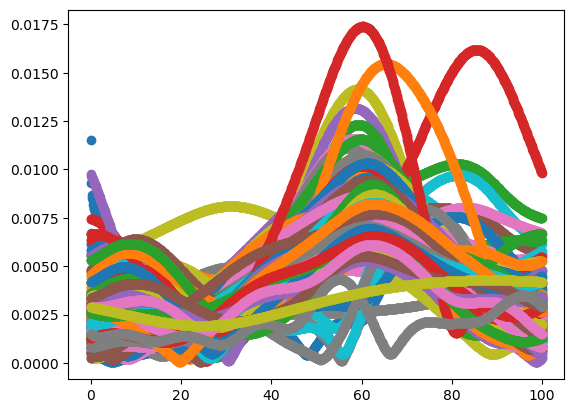

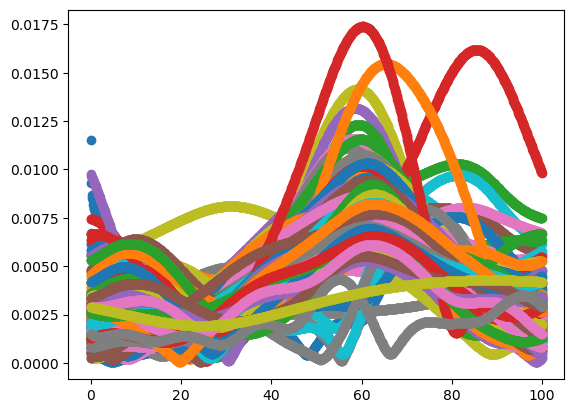

In [13]:
# FDAによるクラスタリング
import skfda
t = np.linspace(0,100,1000)
data_matrix = young_epochs[:,:,0]
fd = skfda.FDataGrid(data_matrix=data_matrix,grid_points=t)
fd.scatter()

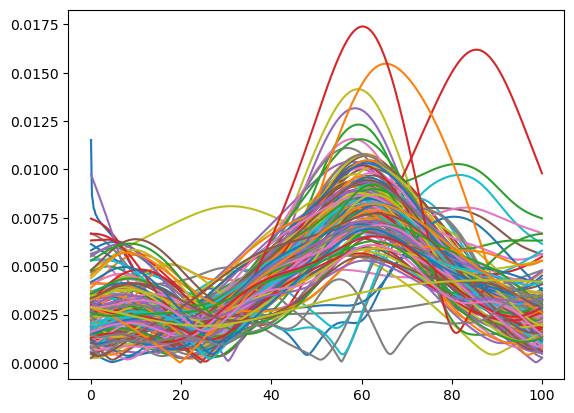

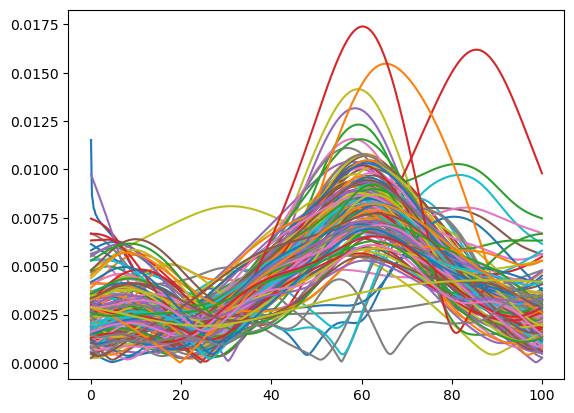

In [14]:
fd.plot()

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from skfda import datasets
from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans
n_clusters = 2
seed = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=seed, )
kmeans.fit(fd)
print(kmeans.predict(fd))

[0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]


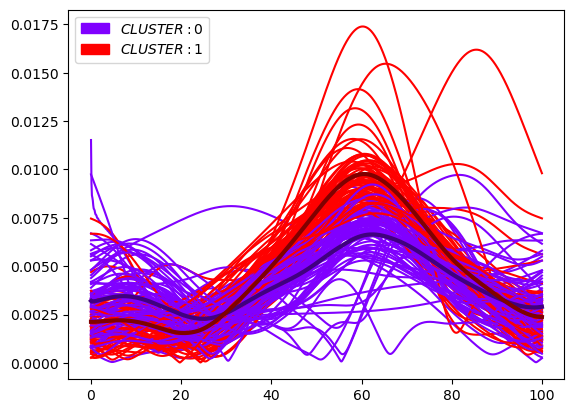

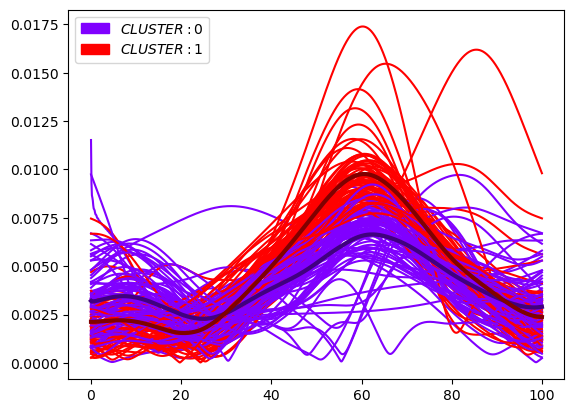

In [16]:
ClusterPlot(kmeans, fd).plot()

In [17]:
import matplotlib.pyplot as plt

import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
    FourierBasis,
    MonomialBasis,
)

ImportError: cannot import name 'FPCA' from 'skfda.preprocessing.dim_reduction' (/Applications/MNE-Python/.mne-python/lib/python3.10/site-packages/skfda/preprocessing/dim_reduction/__init__.py)

In [ ]:
skfda.preprocessing.dim_reduction.

In [ ]:
!pip3 list

Package                       Version
----------------------------- ------------
absl-py                       1.2.0
aiofiles                      0.8.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
antropy                       0.1.4
anyio                         3.6.1
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.3
apptools                      5.1.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.6
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.1
attrs                         22.1.0
autopep8                      1.6.0
autoreject                    0.3.1
Babel                         2.10.3
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.11.1
binaryornot 

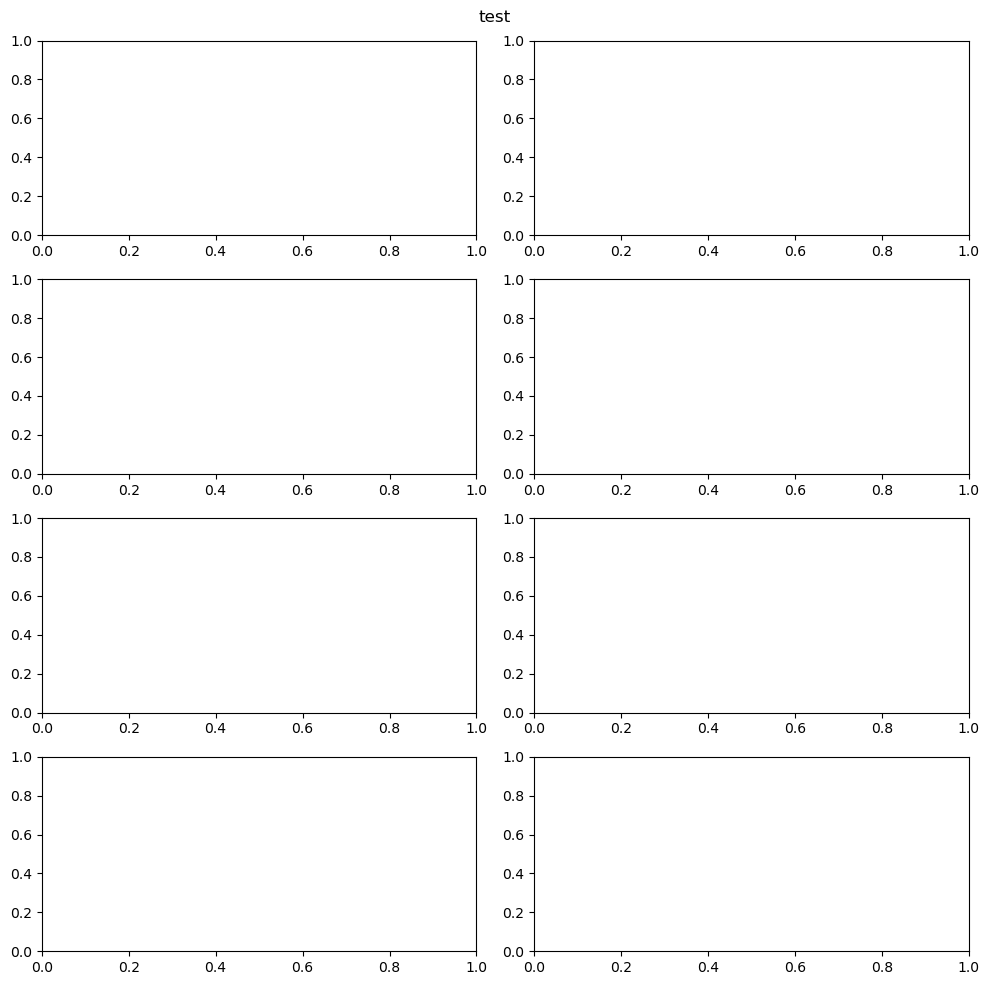

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 2, figsize=(10,10))
plt.suptitle('test', )
fig.tight_layout()

Text(0.5, 0.98, 'test')

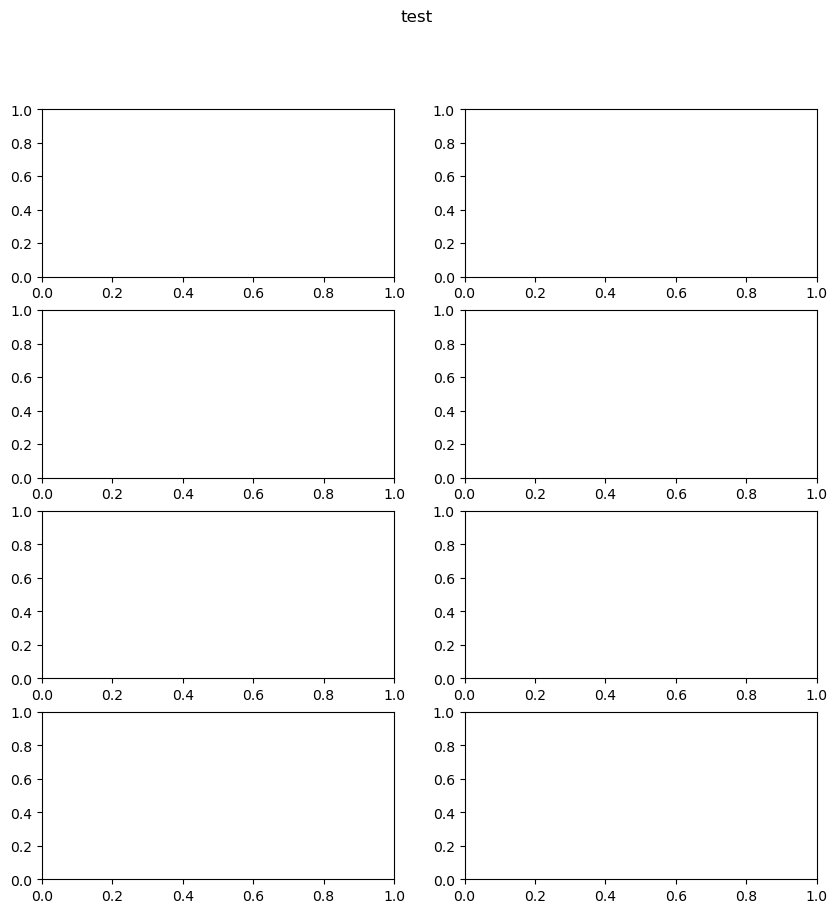

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 2, figsize=(10,10))
plt.suptitle('test', )

In [34]:
import numpy as np
import numpy.linalg as LA
def rpca(M, max_iter=800,p_interval=50):
    def shrinkage_operator(x, tau):
        return np.sign(x) * np.maximum((np.abs(x) - tau), np.zeros_like(x))

    def svd_thresholding_operator(X, tau):
        U, S, Vh = LA.svd(X, full_matrices=False)
        return U @ np.diag(shrinkage_operator(S, tau)) @ Vh

    i = 0
    S = np.zeros_like(M)
    Y = np.zeros_like(M)
    error = np.Inf
    tol = 1e-7 * LA.norm(M, ord="fro")
    mu = M.shape[0] * M.shape[1]/(4 * LA.norm(M, ord=1))
    mu_inv = 1/mu
    lam = 1/np.sqrt(np.max(M.shape))

    while i < max_iter:
        L = svd_thresholding_operator(M - S + mu_inv * Y, mu_inv)
        S = shrinkage_operator(M - L + mu_inv * Y, lam * mu_inv)
        Y = Y + mu * (M - L - S)
        error = LA.norm(M - L - S, ord='fro')
        if i % p_interval == 0:
            print("step:{} error:{}".format(i, error))

        if error <= tol:
            print("converted! error:{}".format(error))
            break
        i+=1
    else:
        print("Not converged")

    return L, S

In [ ]:
import preprocess as pp
import msynergy as ms
